RSI 전략

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [3]:
data = pd.read_csv("eurusd.csv", parse_dates=["Date"], index_col="Date")
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


In [5]:
data.price.diff()

Date
2004-01-01         NaN
2004-01-02    0.000000
2004-01-05    0.010504
2004-01-06    0.003405
2004-01-07   -0.008008
                ...   
2020-06-24    0.003267
2020-06-25   -0.006147
2020-06-26   -0.002879
2020-06-29    0.000378
2020-06-30    0.002134
Name: price, Length: 4275, dtype: float64

**U:**

* 가격이 상승하면, U 열은 가격만큼 상승
* 하락하면, 0

In [6]:
data["U"] = np.where(data.price.diff() > 0, data.price.diff(), 0)

**D:**

* 가격이 상승하면, 0
* 하락하면, U 열은 가격만큼 하락

In [7]:
data["D"] = np.where(data.price.diff() < 0, -data.price.diff(), 0)
data

,price,U,D
Date,,,
2004-01-01,1.258194,0.000000,0.000000
2004-01-02,1.258194,0.000000,0.000000
2004-01-05,1.268698,0.010504,0.000000
2004-01-06,1.272103,0.003405,0.000000
2004-01-07,1.264095,0.000000,0.008008
...,...,...,...
2020-06-24,1.131235,0.003267,0.000000
2020-06-25,1.125087,0.000000,0.006147
2020-06-26,1.122208,0.000000,0.002879


In [8]:
periods = 20

In [9]:
data["MA_U"] = data.U.rolling(periods).mean()
data["MA_D"] = data.D.rolling(periods).mean()
data

,price,U,D,MA_U,MA_D
Date,,,,,
2004-01-01,1.258194,0.000000,0.000000,NaN,NaN
2004-01-02,1.258194,0.000000,0.000000,NaN,NaN
2004-01-05,1.268698,0.010504,0.000000,NaN,NaN
2004-01-06,1.272103,0.003405,0.000000,NaN,NaN
2004-01-07,1.264095,0.000000,0.008008,NaN,NaN
...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981


### RSI 계산

In [10]:
data["RSI"] = data.MA_U / (data.MA_U + data.MA_D) * 100

In [11]:
data.dropna(inplace=True)

In [12]:
data

,price,U,D,MA_U,MA_D,RSI
Date,,,,,,
2004-01-28,1.244199,0.000000,0.019496,0.004610,0.005310,46.472973
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086
...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190


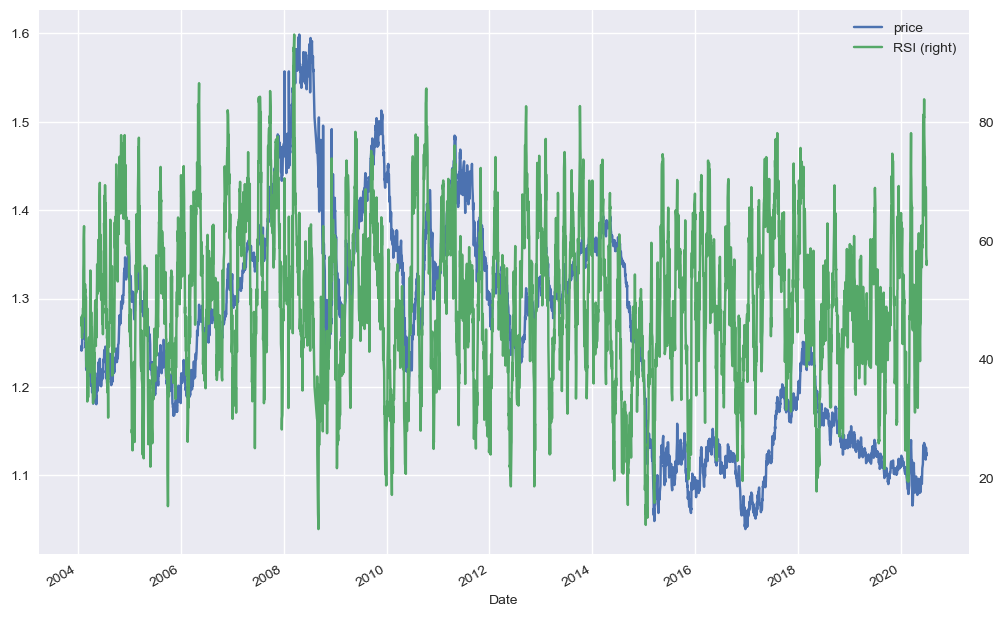

In [13]:
data.loc[:, ["price", "RSI"]].plot(figsize=(12, 8), secondary_y="RSI")
plt.show()

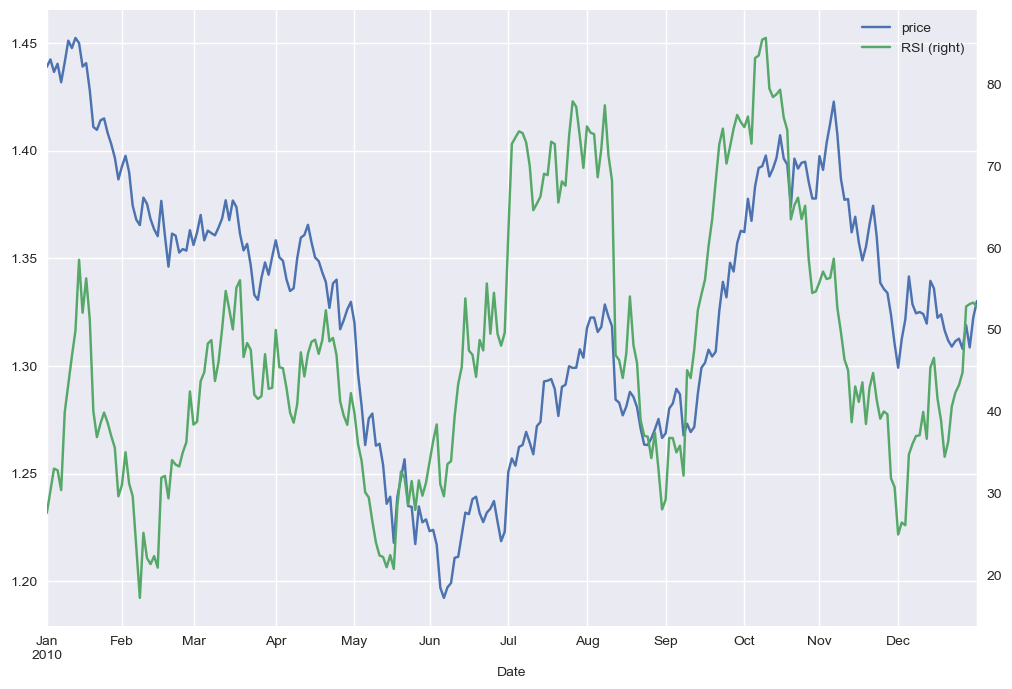

In [14]:
data.loc["2010", ["price", "RSI"]].plot(figsize=(12, 8), secondary_y="RSI")
plt.show()

* 극도록 높은 RSI(>70) 지표는 과매수를 나타낸다 -> 숏
* 극도록 낮은 RSI(<30) 지표는 과매도를 나타낸다 -> 롱

In [20]:
rsi_upper = 70
rsi_lower = 30

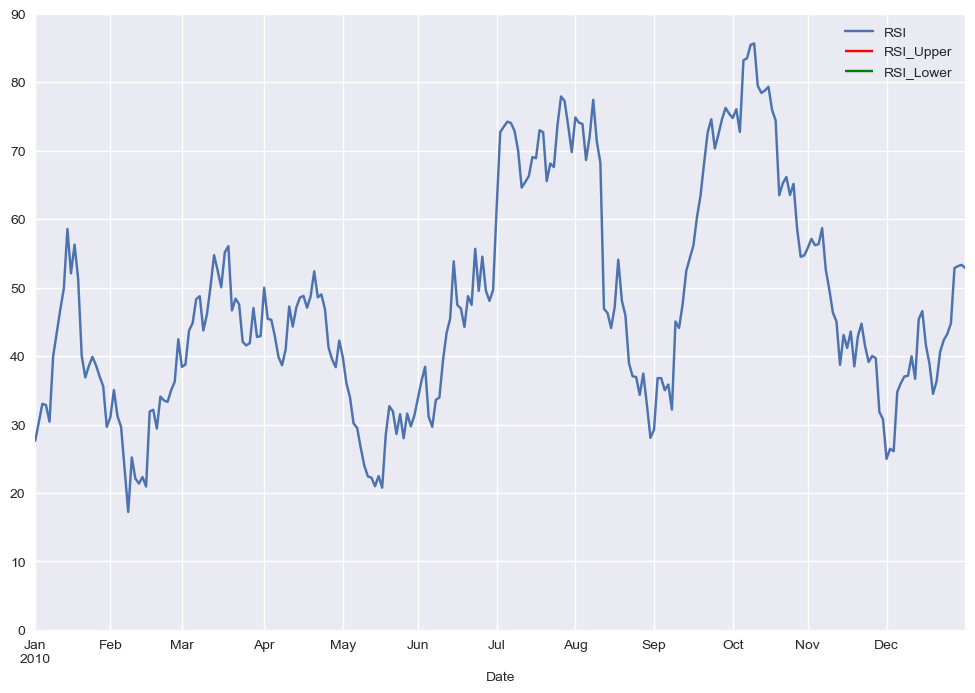

In [21]:
data.loc["2010", ["RSI"]].plot(figsize=(12, 8))
plt.hlines(y=rsi_upper, xmin=data.index[0], xmax=data.index[-1], label="RSI_Upper", color="r")
plt.hlines(y=rsi_lower, xmin=data.index[0], xmax=data.index[-1], label="RSI_Lower", color="g")
plt.yticks(ticks=range(0, 100, 10))
plt.legend()
plt.show()

In [22]:
data["position"] = np.where(data.RSI > rsi_upper, -1, np.nan)
data["position"] = np.where(data.RSI < rsi_lower, 1, data["position"])

In [23]:
data.position = data.position.fillna(0)

In [24]:
data

,price,U,D,MA_U,MA_D,RSI,position
Date,,,,,,,
2004-01-28,1.244199,0.000000,0.019496,0.004610,0.005310,46.472973,0.0
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0


In [25]:
data.position.value_counts()

 0.0    3637
-1.0     316
 1.0     303
Name: position, dtype: int64

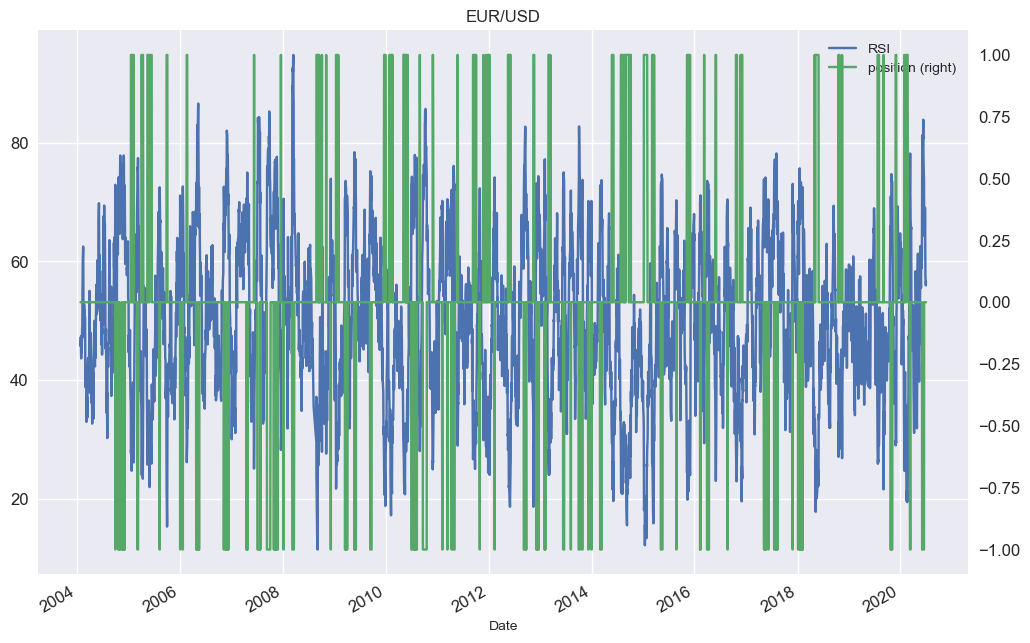

In [26]:
data.loc[:, ["RSI", "position"]].plot(figsize=(12, 8), fontsize=12, secondary_y = "position", title="EUR/USD")
plt.show()

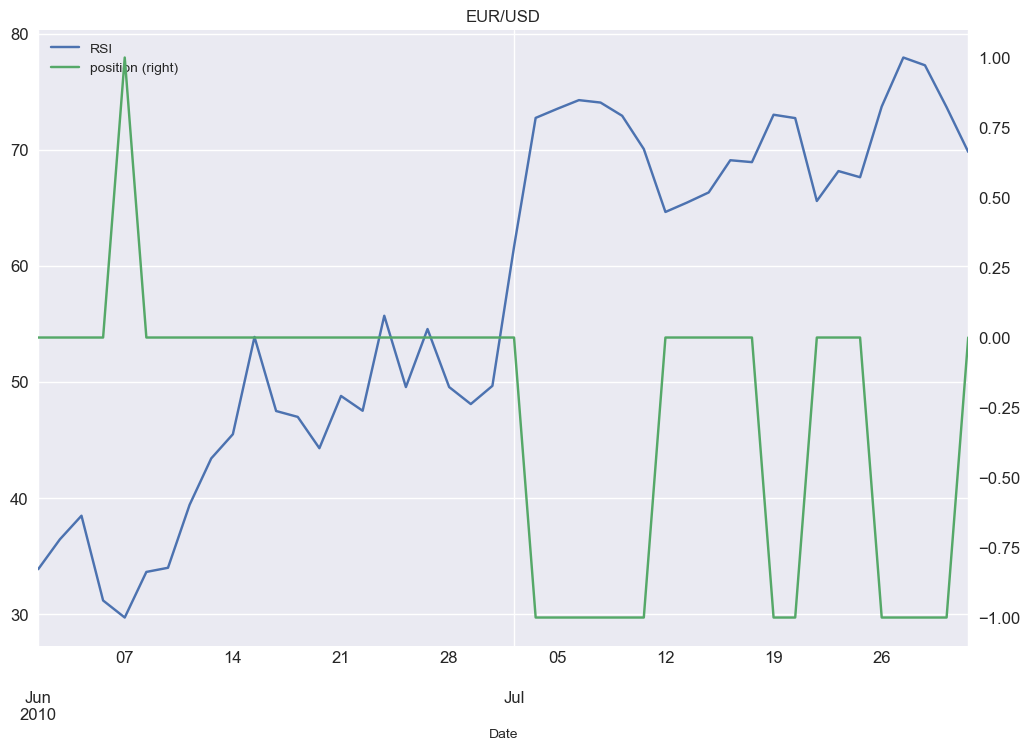

In [27]:
data.loc["06-2010":"07-2010", ["RSI", "position"]].plot(figsize=(12, 8), fontsize=12, secondary_y = "position", title="EUR/USD")
plt.show()

In [28]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))
data

,price,U,D,MA_U,MA_D,RSI,position,returns
Date,,,,,,,,
2004-01-28,1.244199,0.000000,0.019496,0.004610,0.005310,46.472973,0.0,NaN
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0,-0.002572
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562


In [29]:
data.dropna(inplace=True)
data

,price,U,D,MA_U,MA_D,RSI,position,returns
Date,,,,,,,,
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0,-0.002572
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562


In [30]:
data['strategy'] = data.position.shift(1) * data['returns']
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy
Date,,,,,,,,,
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0,-0.002572,NaN
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0
...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0


In [31]:
data.dropna(inplace=True)

In [32]:
ptc = 0.00007

In [33]:
data['trades'] = data.position.diff().fillna(0).abs()
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy,trades
Date,,,,,,,,,,
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0,0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0,0.0
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0,0.0
2004-02-05,1.257197,0.003200,0.000000,0.004229,0.005244,44.642922,0.0,0.002549,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0,0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0,0.0


In [34]:
data.trades.value_counts()

0.0    3926
1.0     328
Name: trades, dtype: int64

In [35]:
data["strategy_net"] = data.strategy - data.trades * ptc
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy,trades,strategy_net
Date,,,,,,,,,,,
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0,0.0,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0,0.0,-0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0,0.0,0.0
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0,0.0,0.0
2004-02-05,1.257197,0.003200,0.000000,0.004229,0.005244,44.642922,0.0,0.002549,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0,0.0,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0,0.0,-0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0,0.0,-0.0


In [36]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [37]:
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
Date,,,,,,,,,,,,,,
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0,0.0,0.0,1.004676,1.000000,1.000000
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0,0.0,-0.0,1.001852,1.000000,1.000000
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0,0.0,0.0,1.010066,1.000000,1.000000
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0,0.0,0.0,1.010471,1.000000,1.000000
2004-02-05,1.257197,0.003200,0.000000,0.004229,0.005244,44.642922,0.0,0.002549,0.0,0.0,0.0,1.013050,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0,0.0,0.0,0.911549,1.562978,1.527501
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0,0.0,-0.0,0.906595,1.562978,1.527501
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0,0.0,-0.0,0.904276,1.562978,1.527501


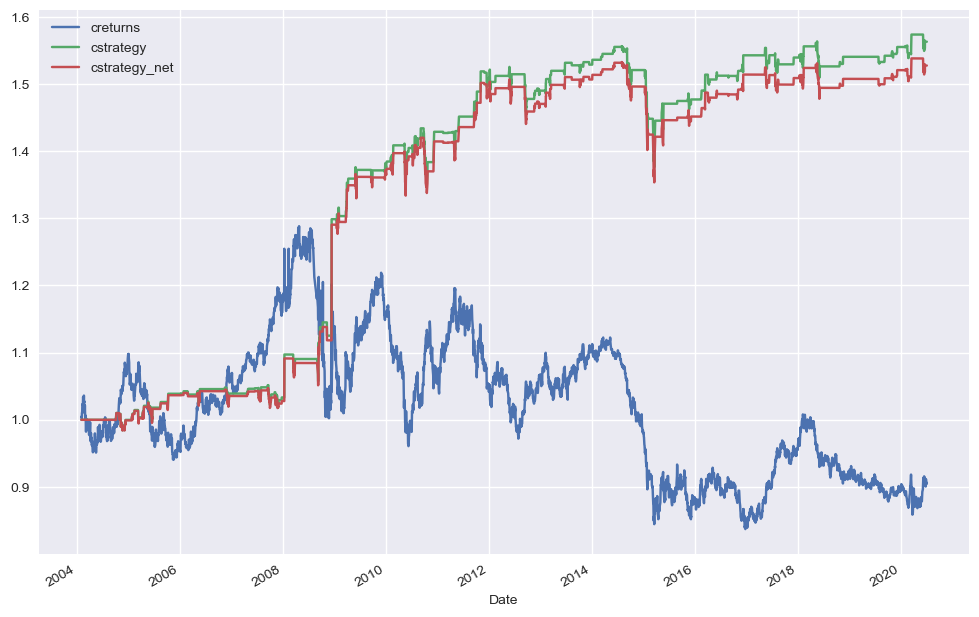

In [38]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize=(12, 8))
plt.show()

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

In [40]:
pd.read_csv("forex_pairs.csv")

,Date,AUDEUR=X,EURUSD=X,USDGBP=X
0,2004-01-01,0.59780,1.258194,0.56016
1,2004-01-02,0.60314,1.258194,0.55751
2,2004-01-05,0.60467,1.268698,0.55334
3,2004-01-06,0.60350,1.272103,0.54906
4,2004-01-07,0.60728,1.264095,0.55012
...,...,...,...,...
4290,2020-06-24,0.61349,1.131235,0.79841
4291,2020-06-25,0.60938,1.125087,0.80561
4292,2020-06-26,0.61373,1.122208,0.80480
4293,2020-06-29,0.61128,1.122586,0.81023


In [41]:
from RSIBacktester import RSIBacktester as RSI

In [42]:
ptc = 0.00007

In [43]:
tester = RSI("EURUSD=X", periods=20, rsi_upper=70, rsi_lower=30, start="2004-01-01", end="2020-06-30", tc=ptc)
tester

RSIBacktester(symbol = EURUSD=X, RSI(20, 70, 30), start = 2004-01-01, end = 2020-06-30)

In [45]:
tester.data

,price,returns,U,D,MA_U,MA_D,RSI
Date,,,,,,,
2004-01-01,1.258194,NaN,0.000000,0.000000,NaN,NaN,NaN
2004-01-02,1.258194,0.000000,0.000000,0.000000,NaN,NaN,NaN
2004-01-05,1.268698,0.008313,0.010504,0.000000,NaN,NaN,NaN
2004-01-06,1.272103,0.002681,0.003405,0.000000,NaN,NaN,NaN
2004-01-07,1.264095,-0.006315,0.000000,0.008008,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,0.003267,0.000000,0.003182,0.001530,67.538713
2020-06-25,1.125087,-0.005449,0.000000,0.006147,0.003007,0.001837,62.077668
2020-06-26,1.122208,-0.002562,0.000000,0.002879,0.002696,0.001981,57.643190


In [46]:
tester.test_strategy()

(1.527501, 0.62353)

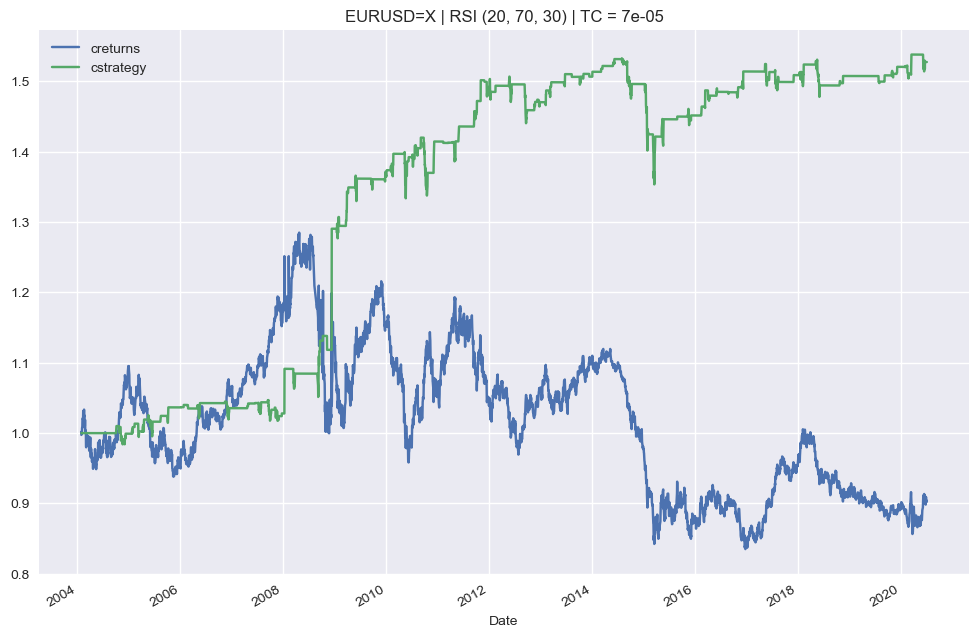

In [47]:
tester.plot_results()

In [48]:
tester.optimize_parameters((5, 20, 1), (65, 80, 1), (20, 35, 1))

(array([ 6., 65., 20.]), 2.582989)

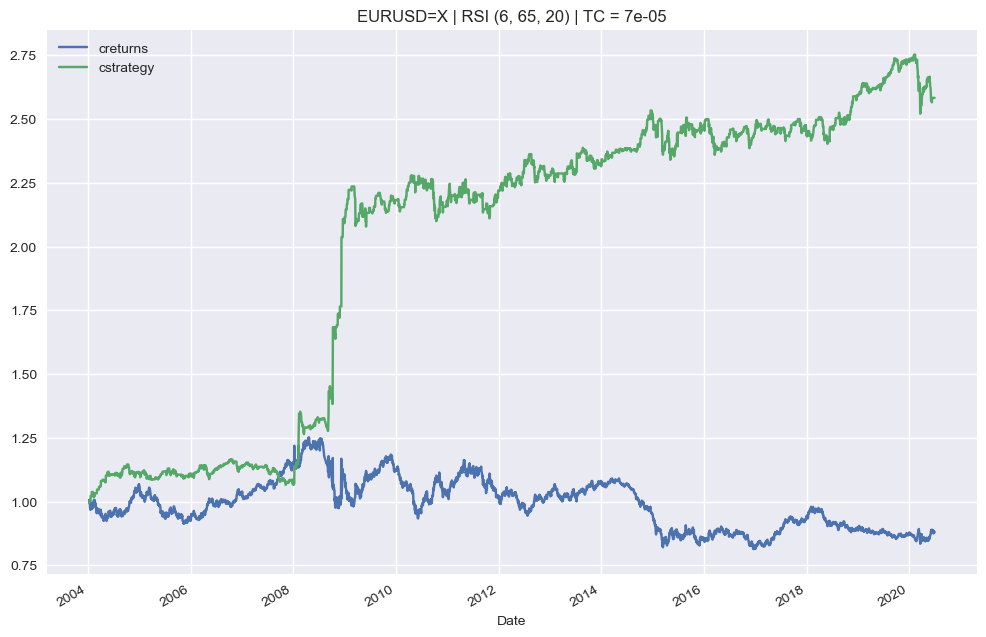

In [49]:
tester.plot_results()

In [50]:
tester.optimize_parameters((20, 50, 1), (75, 85, 1), (15, 25, 1))

(array([26., 75., 24.]), 1.237744)

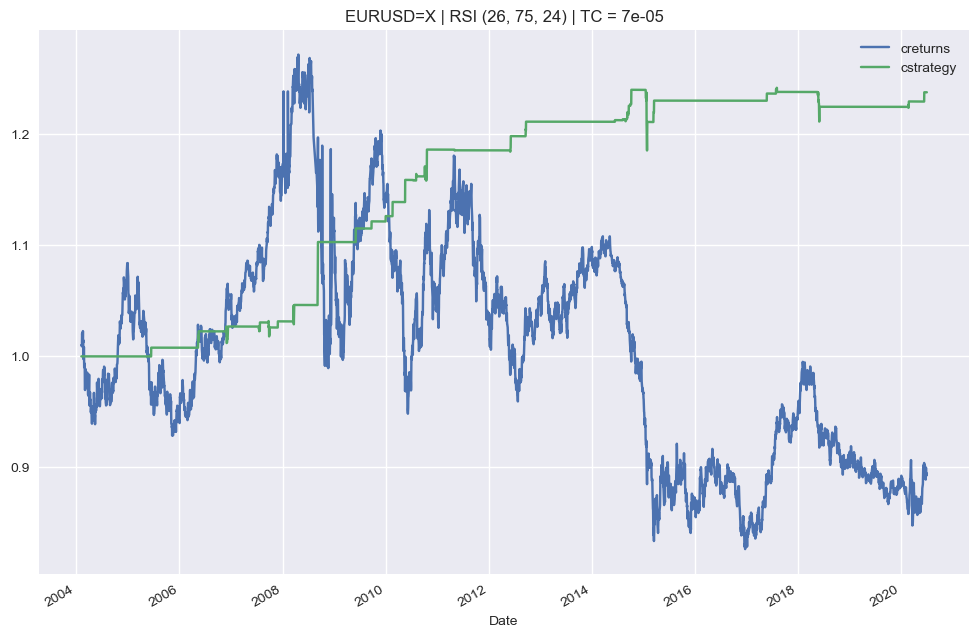

In [51]:
tester.plot_results()

In [52]:
tester.results

,price,returns,U,D,MA_U,MA_D,RSI,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,,
2004-02-06,1.270002,0.010134,0.012805,0.000000,0.004796,0.004342,52.484955,0.0,0.0,0.0,1.010185,1.000000
2004-02-09,1.269406,-0.000470,0.000000,0.000596,0.004796,0.004365,52.353541,0.0,-0.0,0.0,1.009711,1.000000
2004-02-10,1.268504,-0.000711,0.000000,0.000902,0.004392,0.004400,49.957733,0.0,-0.0,0.0,1.008994,1.000000
2004-02-11,1.283005,0.011367,0.014501,0.000000,0.004819,0.004400,52.274267,0.0,0.0,0.0,1.020528,1.000000
2004-02-12,1.281805,-0.000936,0.000000,0.001200,0.004819,0.004138,53.802360,0.0,-0.0,0.0,1.019573,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,0.003267,0.000000,0.003012,0.001484,66.989516,0.0,0.0,0.0,0.899807,1.237744
2020-06-25,1.125087,-0.005449,0.000000,0.006147,0.002963,0.001721,63.265414,0.0,-0.0,0.0,0.894917,1.237744
2020-06-26,1.122208,-0.002562,0.000000,0.002879,0.002751,0.001831,60.034559,0.0,-0.0,0.0,0.892627,1.237744


In [56]:
tester = RSI("USDGBP=X", periods=20, rsi_upper=70, rsi_lower=30, start="2004-01-01", end="2020-06-30", tc=0)
tester

RSIBacktester(symbol = USDGBP=X, RSI(20, 70, 30), start = 2004-01-01, end = 2020-06-30)

In [57]:
tester.test_strategy()

(1.060393, -0.414041)

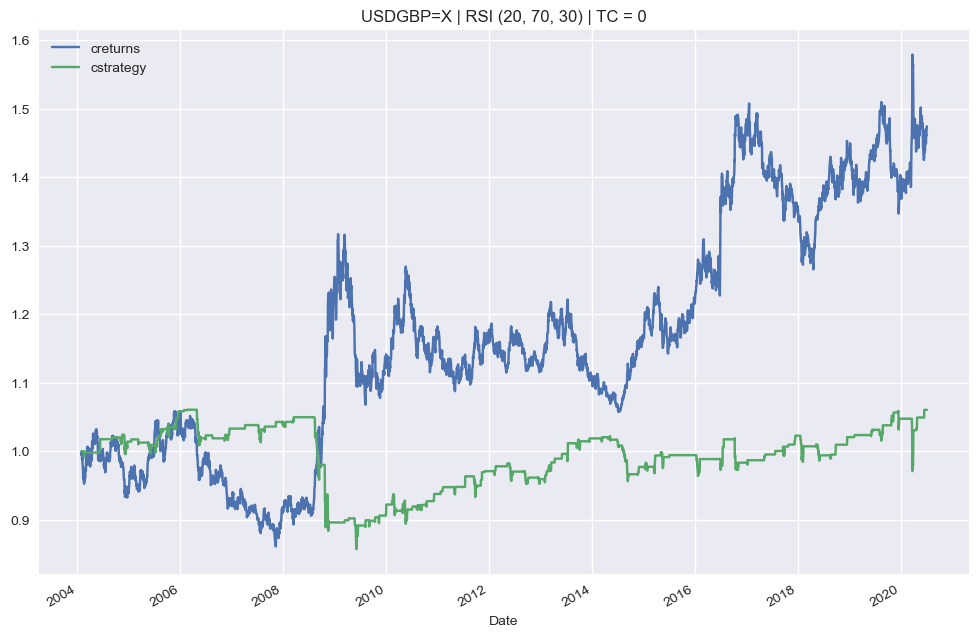

In [58]:
tester.plot_results()

In [59]:
tester.optimize_parameters((5, 20, 1), (65, 80, 1), (20, 35, 1))

(array([ 7., 66., 34.]), 1.515508)

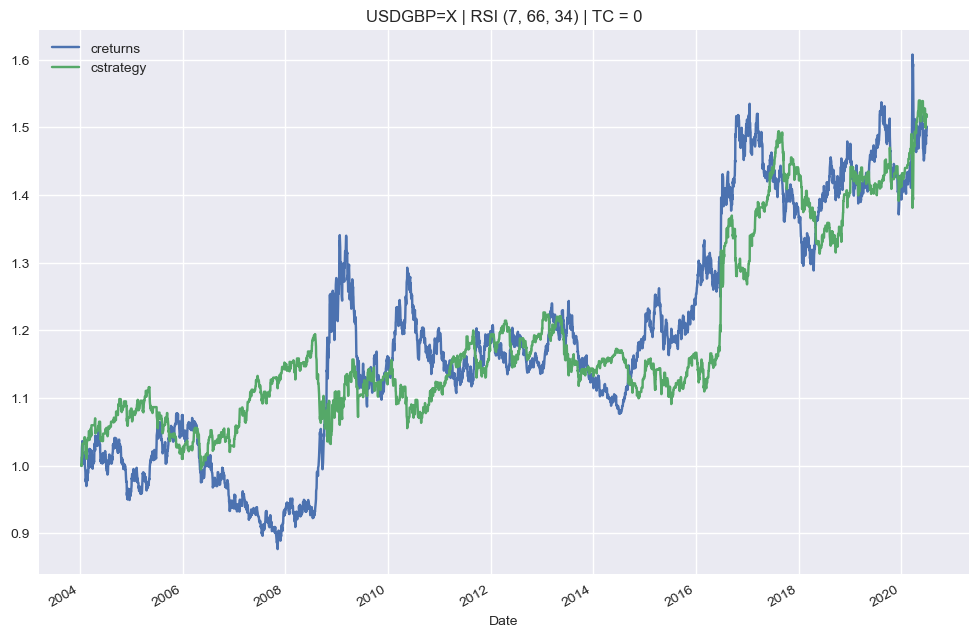

In [60]:
tester.plot_results()

## 대안 전략과 설명

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

In [62]:
from RSIBacktester import RSIBacktester as RSI

In [63]:
tester = RSI("EURUSD=X", periods=20, rsi_upper=70, rsi_lower=30,
             start="2004-01-01", end="2020-06-30", tc=0)

In [65]:
alt = tester.data.dropna()
alt

,price,returns,U,D,MA_U,MA_D,RSI
Date,,,,,,,
2004-01-28,1.244199,-0.015548,0.000000,0.019496,0.004610,0.005310,46.472973
2004-01-29,1.241003,-0.002572,0.000000,0.003196,0.004610,0.005470,45.736150
2004-01-30,1.246805,0.004665,0.005802,0.000000,0.004900,0.005470,47.254310
2004-02-02,1.243302,-0.002814,0.000000,0.003503,0.004375,0.005645,43.663573
2004-02-03,1.253494,0.008164,0.010192,0.000000,0.004714,0.005645,45.509086
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,0.003267,0.000000,0.003182,0.001530,67.538713
2020-06-25,1.125087,-0.005449,0.000000,0.006147,0.003007,0.001837,62.077668
2020-06-26,1.122208,-0.002562,0.000000,0.002879,0.002696,0.001981,57.643190


Convergence(수렴)

* 가격이 고점을 높이고, RSI 도 고점을 높이면(수렴)
* 가격이 저점을 낮추고, RSI 도 저점을 낮추면(수렴)

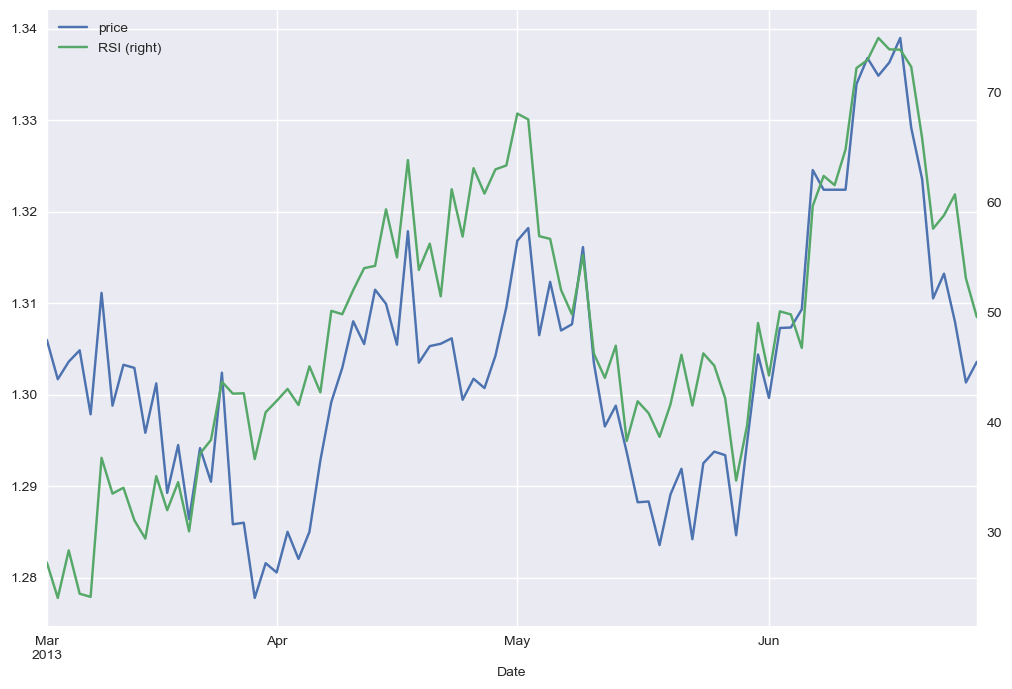

In [66]:
alt.loc["03-2013":"06-2013", ["price", "RSI"]].plot(figsize=(12, 8), secondary_y="RSI")
plt.show()

Divergence(확산)

* 가격이 고점을 높이지만, RSI 가 고점을 높이지 못하면(약세장 확산)
* 가격이 저점을 낮추지만, RSI 가 저점을 낮추지 못하면(강세장 확산)

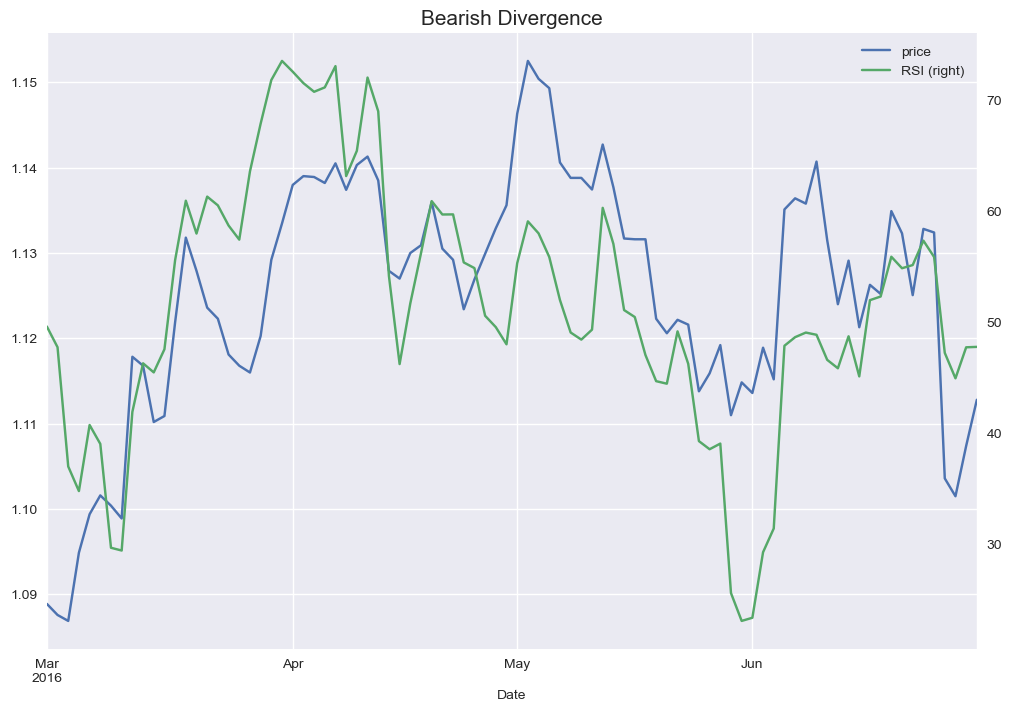

In [67]:
alt.loc["03-2016":"06-2016", ["price", "RSI"]].plot(figsize=(12, 8), secondary_y="RSI")
plt.title("Bearish Divergence", fontsize=15)
plt.show()

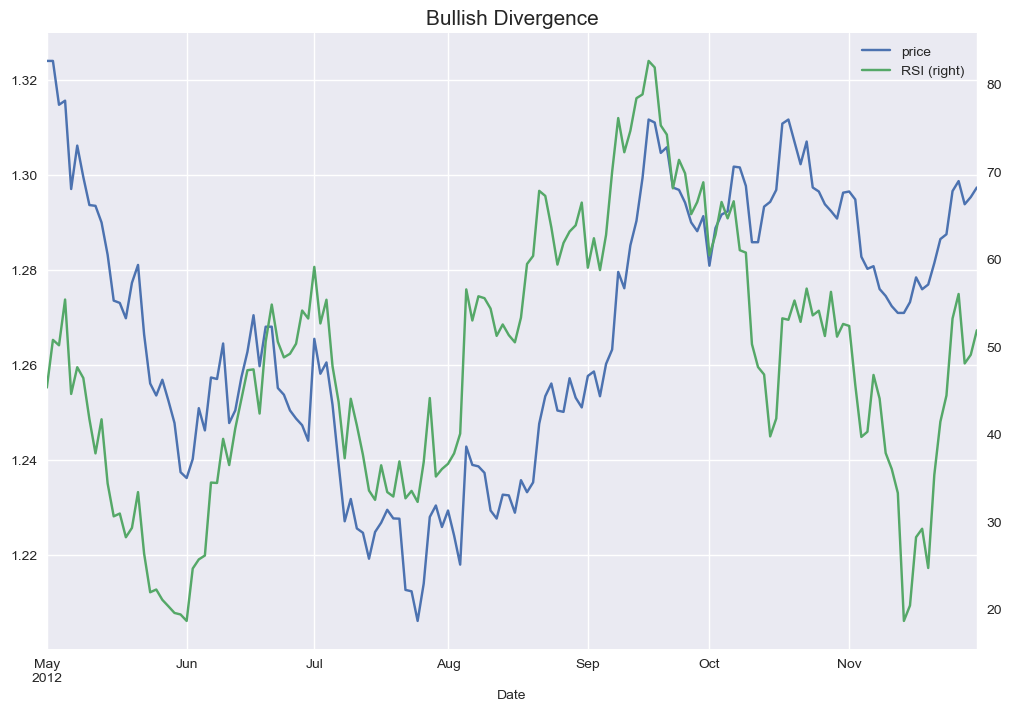

In [70]:
alt.loc["05-2012":"11-2012", ["price", "RSI"]].plot(figsize=(12, 8), secondary_y="RSI")
plt.title("Bullish Divergence", fontsize=15)
plt.show()